## Introduction

<img src="images/library.png" style="width: 1000px;">

- most of the informations in the world is stored within lines of a book or a paper.
- library of congress has over 155.3 items which is a huge number for any human being to process if a lifetime.
- It would take 500 years reading 10 items/day for a human to read all the congress library, not to mention processing and visualizing.
- Text Mining is becoming a powerful field due the computational power of computers nowadays.
- Text visualization techniques makes it possible for humans to read the most important aspect of that data in a comparatively short period of time.

## Use Case Demonstrations

### Popularity of an N-gram overtime. 
#### Fig. A graph generated by Google Ngram Viewer with key words “Frankenstein” ”Albert Einstein” and “Sherlock Holmes” to show the development of the use of words.
<img src="images/bigram.png"  style="width: 1000px;">

### Text Archeology
#### Fig. A graph generated by Google Ngram Viewer to show the development of astronomy
<img src="images/3grams.png" style="width: 1000px;">

### Relationship between words: Hashtags in tweets as an example
<img src="images/network.png" style="width: 1000px;">

# Visualization in Arabic Songs Lyrics Dataset : 
Link to dataset : http://ucrel-web.lancaster.ac.uk/habibi/?fbclid=Iw

## Data Description

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd

rcParams['figure.figsize'] = (20, 10)

Data contains verses of songs their titles, singer, composer, nationality of the singer and dialect of the song.

In [2]:
arabic_lyrics = pd.read_csv("arabicLyrics.csv")
arabic_lyrics.head()

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,Morocco,Meghribi
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,Morocco,Meghribi
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,Morocco,Meghribi
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,Morocco,Meghribi
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,Morocco,Meghribi


## How many songs in this DataSet ?

In [4]:
arabic_lyrics["SongTitle"].nunique()

25799

### Grouping Verses Of Songs

In [5]:
all_lyrics_by_singer = arabic_lyrics.groupby(['songID',
                                              'Singer',
                                              'SongTitle',
                                              'SongWriter',
                                              'Composer',
                                              'SingerNationality'])['Lyrics'].apply(lambda x: ' '.join(x)).reset_index()

# example of lyrics grouped after they were separated
all_lyrics_by_singer.iloc[5]['Lyrics']

'الله كريم يا هوى و بيرضى على العاشقين و عيون حبيبي يا هوى علي مش راضين و احلف بروح روحي هو وعيني روحي يا دمعتي و جروحي قوليلو قلبك فين انا في الغرام قلبي من جرحو من قلبي و يا عيني على العاشقين نار الفراق نارهم و يامين يصبربهم على كل دمعة عين و اروح و اشكي لمين جرح الحبيب جرحين و احلف بروح روحي هو و عيني و روحي يا دمعتي و جروحي قوليلو قلبك فين لو يوم عييني قالو جرحي بيحلالو بعشق عذابي معاه و اعيش على جرحو من تانيو اسامحو قدري انا بهواه و روح و اشكي لمين جرح الحبيب جرحين و احلف بروح روحي هو وعيني روحي يا دمعتي و جروحي قوليلو قلبك فين'

In [44]:
all_lyrics_by_singer.head()

,songID,Singer,SongTitle,SongWriter,Composer,SingerNationality,Lyrics
0,1,مي سليم,إحلوّت الأيام,محمد عاطف,رامي جمال,Jordan,من يوم ماجيت على قلبى ناديت بهوالك حسيت فرحة ع...
1,2,هيثم يوسف,إنسي,ضياء الميالي,هيثم يوسف,Iraq,انسى ولا تعذب قلبك صدقني الحب يتعبك ما اريدك ي...
2,3,هيثم يوسف,احباب الروح,خضير هادي -حازم جابر,هيثم يوسف,Iraq,أحبـــاب الروح أحباب الروح جرحوني راحوا لبعيد ...
3,4,عبد المنعم العامري,الاسطورة,عبد الله مانع,طارق المقبل,UAE,ربي خلق في الكون الاف والاف بس بحالاتك ما خلق ...
4,5,الجان محمود عبد العزيز,الحنين,المعز فتح الرحمن,المعز فتح الرحمن,Sudan,انت ما قتلى لي... كلمتنى عيونى عن مشاعر صادقة ...


## How many songs in every dialect ?

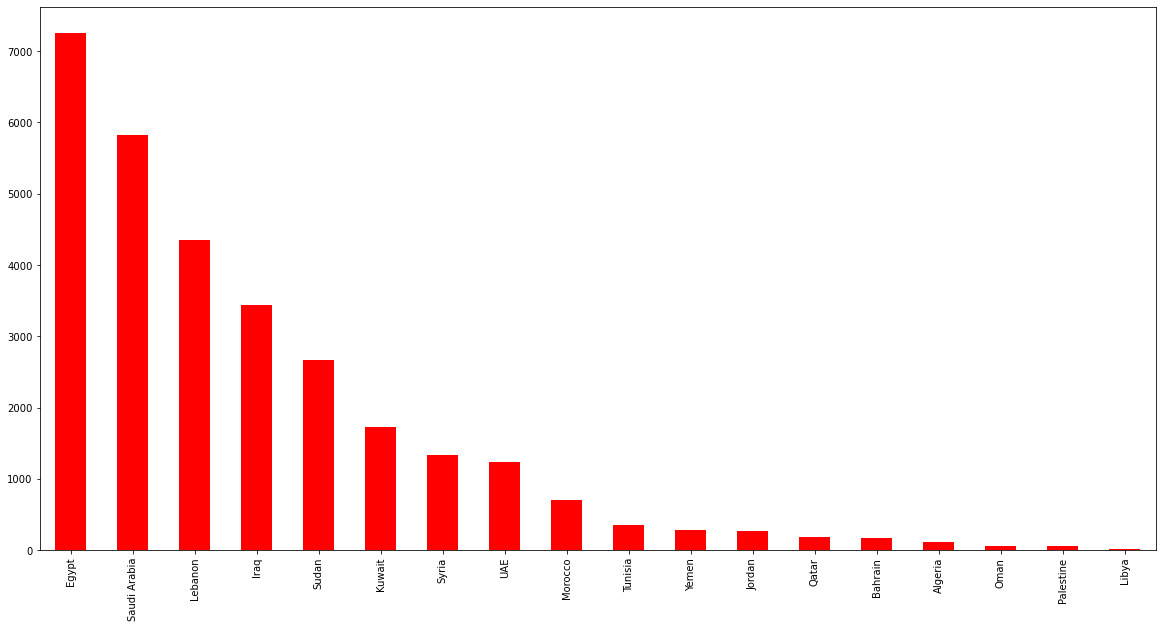

In [54]:
all_lyrics_by_singer["SingerNationality"].value_counts().plot(kind="bar",colormap="autumn")